<a href="https://colab.research.google.com/github/antra0497/MLE-humming-and-whistling/blob/main/ECS7020P_miniproject_basic_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Author**

**Student Name**:  Antra Tripathi

**Student ID**:  210787830



# **2. Problem formulation**

A  basic Machine Learning solution to identify if the audio file is from ```Harry Potter``` or ```Starwars```.

**Data Used:** ```MLEnd Hums and Whistles dataset```


# **3. Machine Learning pipeline**

*   **Data Used:** ```MLEnd Hums and Whistles ```
*   **Song Type:** ```Harry Potter and StarWars```
*   **Audio Type:** ```Humming or Whistling```
*   **File Format:** ```.wav``` files

Underline Steps:
* Importing required python libraries
* Data Cleaning Function
* Reading and processing Harry Potter audio files
* Reading and processing StarWars audio files
* Merging and creating final dataframe
* Feature Extraction from the audio files
* Data Exploration
* Data Normalization
* Data Split
* Dummy check for Humming and whistling classification. 
* Model 1: SVM classifier for classifying Harry Potter or Starwars files
* Analysing the results



#### **Importing required Python libraries** 

In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn visualization library

import os, sys, re, pickle, glob
drive.mount('/content/drive')

import IPython.display as ipd
from tqdm import tqdm #show a smart progress meter
import librosa # for loading the audio file to TS

from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **Data Cleaning Function:**

In [ ]:
final_list=[] # global list to save all the files

In [ ]:
def get_clean_dataframe(files, song_list, title):
  '''
  This is a data cleaning function, its takes following inputs:

  files: list of the file paths whch are to be processed
  song_list: list of possible song names mentioned in the file name
  title: correct title of the file

  It returns a data frame containing following columns:
  file_id, participant, interpretation, number, song
  ''' 
  table = [] 

  for file in files:
    
    file_name = file.split('/')[-1] #complete file name

    participant_ID = file.split('/')[-1].split('_')[0] #extrating the participant id

    # to identify if file has lable 'hum' or 'whistle'
    try:
      if 'hum' in file_name:
        interpretation_type= 'hum'
      if 'whistle' in file_name:
        interpretation_type= 'whistle'
    except:
      print(file_name)


    num_list= ['1','2','3','4']
    sub_list= file_name.split('_')[1:]
    try:    
      interpretation_number = [num for sub in sub_list for num in num_list if num in sub][0]
    except:
      print(file_name)

    # check the possible file name and assigning the correct title of the song   
    try:
      song = [title for name in song_list if name in file_name][0]
    except:
      print(file_name)
    
    #appending all the correctly extracted info in a list 'table' 
    table.append([file_name,participant_ID,interpretation_type,interpretation_number, song])
  
  #finaly converting the list into the data frame
  df= pd.DataFrame(table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id')    
  return df #returning the final data frame


### **Reading Harry Potter audio files:**

In [ ]:
sample_path = '/content/drive/MyDrive/Colab Notebooks/ML/MiniProject/Full Data/HarryPotter/*.wav'
files_harry = glob.glob(sample_path)
final_list.extend(files_harry)

title='Harry' #correct title of the song
# all the possible titles to be found in the file names.
song_list= ['Potter', 'potter', 'Harry', 'harry']

Harry_df= get_clean_dataframe(files_harry, song_list, title)

In [ ]:
print(len(files_harry), Harry_df.shape, len(final_list))

411 (411, 4) 411


In [ ]:
Harry_df.head(5)

,participant,interpretation,number,song
file_id,,,,
S3_hum_1_Potter.wav,S3,hum,1,Harry
S1_whistle_2_Potter.wav,S1,whistle,2,Harry
S2_hum_2_Potter.wav,S2,hum,2,Harry
S3_hum_2_Potter.wav,S3,hum,2,Harry
S2_whistle_2_Potter.wav,S2,whistle,2,Harry


In [ ]:
Harry_df.nunique() # checking the unique values in Harry dataframe

participant       206
interpretation      2
number              4
song                1
dtype: int64

### **Reading Starwars audio files:**

In [ ]:
sample_path = '/content/drive/MyDrive/Colab Notebooks/ML/MiniProject/Full Data/StarWars/*.wav'
files_starwars = glob.glob(sample_path)
final_list.extend(files_starwars)

title='StarWars' #correct title of the song
# all the possible titles to be found in the file names.
song_list= ['StarWars','StarWar','Star Wars','Star War','Starwars', 'Imperial', 'starwars','StarsWars',
              'star_wars', 'starwar', 'imperial_march','STARWAR', 'StartWars','StatWars','Star wars','star wars'] 

Starwars_df= get_clean_dataframe(files_starwars, song_list, title)

In [ ]:
Starwars_df.head(5)

,participant,interpretation,number,song
file_id,,,,
S115_whistle_2_StarWars.wav,S115,whistle,2,StarWars
S117_hum_2_StarWars.wav,S117,hum,2,StarWars
S119_hum_4_StarWars.wav,S119,hum,4,StarWars
S116_hum_3_StarWars.wav,S116,hum,3,StarWars
S120_whistle_2_StarWars.wav,S120,whistle,2,StarWars


In [ ]:
Starwars_df.nunique()

participant       207
interpretation      2
number              4
song                1
dtype: int64

In [ ]:
print(len(files_harry), Harry_df.shape, len(final_list))

411 (411, 4) 824


### **Merging all the Harry Potter and Starwars files:**

In [ ]:
#creating a final dataframe containing infromation of both Harry and Starwars files:
final_df= pd.concat([Harry_df, Starwars_df], sort=False) 

In [ ]:
final_df

,participant,interpretation,number,song
file_id,,,,
S3_hum_1_Potter.wav,S3,hum,1,Harry
S1_whistle_2_Potter.wav,S1,whistle,2,Harry
S2_hum_2_Potter.wav,S2,hum,2,Harry
S3_hum_2_Potter.wav,S3,hum,2,Harry
S2_whistle_2_Potter.wav,S2,whistle,2,Harry
...,...,...,...,...
S102_whistle_1_Star wars.wav,S102,whistle,1,StarWars
S103_hum_2_StarWars.wav,S103,hum,2,StarWars
S114_hum_4_star wars.wav,S114,hum,4,StarWars


In [ ]:
len(final_list)

824

# **4.Transformation stage**

### **Feature Extraction:**

Here we are generating following features from the audio data:

* Power
* Pitch Mean
* Pitch Std.
* Voice Frame
* Interpretation Label
* Song Label

In [ ]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [ ]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y,z =[],[],[] 
  # different song lable 
  slable= ['Frozen', 'Harry', 'Panther', 'StarWars', 'Rain','Hakuna', 'Mamma']
  for file in tqdm(files):
    
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    
    # Feature for interpretation type of the file, True for hum, False for whistle
    y1 = labels_file.loc[fileID]['interpretation']=='hum'

    # Feature for type of the song,
    if(labels_file.loc[fileID]['song']==slable[0]):
      y2 = 0 # label 0 if file is Frozen song
    elif(labels_file.loc[fileID]['song']==slable[1]):
      y2 = 1 # label 1 if file is Harry song
    elif(labels_file.loc[fileID]['song']==slable[2]):
      y2 = 2 # label 2 if file is Panther song
    elif(labels_file.loc[fileID]['song']==slable[3]):
      y2 = 3 # label 3 if file is Starwars song
    elif(labels_file.loc[fileID]['song']==slable[4]):
      y2 = 4 # label 4 if file is Raina song
    elif(labels_file.loc[fileID]['song']==slable[5]):
      y2 = 5 # label 5 if file is Hakuna song
    else:
      y2 = 6 # label 6 if file is Mamma song
    
    
    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    # appending four calculated features
    xi = [power,pitch_mean,pitch_std,voiced_fr] 
    X.append(xi) # calculated features
    y.append(y1) # interpretation label
    z.append(y2) # song label

  return np.array(X),np.array(y),np.array(z)

In [ ]:
X,y,z = getXy(final_list, labels_file=final_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 824/824 [39:19<00:00,  2.86s/it]


In [ ]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The shape of z is', z.shape)
#print('The labels vector is', y)
#print('The feature vector is', X)

The shape of X is (824, 4)
The shape of y is (824,)
The shape of z is (824,)


### **Feature Scaling: Data Normalization**

Its important to scale our feature before using them in any Machine Learning algorithms as all the features have different scale and will not be treated uniformly by the ML model if not scaled. 

Using Standard Scaler library of sklearn preprocessing package.
It uses ```z-score``` to normalize the data.

In [ ]:
scaler = StandardScaler() # define standard scaler
scaled = scaler.fit_transform(X) # transform data

#converting the scaled features into a pandas data frame
feature_pitch= pd.DataFrame(scaled, columns={'power','pitch_mean','pitch_std','voiced_fr'})
feature_pitch['interpret_lable']= y
feature_pitch['song_lable']= z

#saving the features into a csv for future reference
feature_pitch.to_csv('/content/drive/MyDrive/Colab Notebooks/ML/MiniProject/feature_pitch.csv')

# **5.Modelling**


#### **Reading feature file**

In [ ]:
scaled_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/MiniProject/feature_pitch.csv').drop(columns={'Unnamed: 0'})

In [ ]:
scaled_data.shape #checking the size of the dataframe

(824, 6)

In [ ]:
scaled_data.head(5) #displaying first 5 files of the data

,voiced_fr,pitch_std,pitch_mean,power,interpret_lable,song_lable
0,1.178273,-0.803884,-0.928168,1.520872,True,1
1,-0.421257,1.399481,-0.659931,-4.103213,False,1
2,0.306745,-0.852006,0.384201,0.882818,True,1
3,0.498770,-0.861109,-0.970195,1.221544,True,1
4,-0.052247,1.275052,-0.084922,0.257885,False,1


In [ ]:
scaled_data['song_lable'].unique() #Checking labels for Harry and Starwars

array([1, 3])

#### **Data Split**

There are total 824 audio files in total. 
We will be spliting our dataset in 7:2:1 ratio
* 70% files for training 
* 20% files for validation
* 10% files for testing


In [ ]:
X= scaled_data.iloc[:,0:4] # voiced_fr, pitch_std, pitch_mean, power
y= scaled_data['interpret_lable'] # hum or whistle

Spliting main dataset into 70% (training) and 30% (remaining)

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y,test_size=0.3)

Spliting remaining 30% files int0 2:1 ratio for validation and testing

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem,test_size=0.1)

In [ ]:
#checking the data split 
print('Size of training set:', X_train.shape, y_train.shape)
print('Size of validation set:', X_val.shape, y_val.shape)
print('Size of testing set:', X_test.shape, y_test.shape)

Size of training set: (576, 4) (576,)
Size of validation set: (223, 4) (223,)
Size of testing set: (25, 4) (25,)


#### **Classify if the audio is Hum or Whistle???**

In [ ]:
model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.9722222222222222
Validation  Accuracy 0.9641255605381166
The support vectors are (91, 4)


#### **Classify if the audio is Harry or Starwars??**


In [ ]:
X= scaled_data.iloc[:,0:4] # voiced_fr, pitch_std, pitch_mean, power
y= scaled_data['song_lable'] # Harry or StarWars

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem,test_size=0.1)

#checking the data split 
print('Size of training set:', X_train.shape, y_train.shape)
print('Size of validation set:', X_val.shape, y_val.shape)
print('Size of testing set:', X_test.shape, y_test.shape)

Size of training set: (576, 4) (576,)
Size of validation set: (223, 4) (223,)
Size of testing set: (25, 4) (25,)


In [ ]:
model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

# **6. Methodology**

Analysing the accuracy and confusion matrix for better understanding of the results.

#### **Accuracy of SVM model:**

In [ ]:
print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.6840277777777778
Validation  Accuracy 0.5874439461883408
The support vectors are (494, 4)


#### **Confusing Matrix**

In [ ]:
classes=['Harry', 'StarWars']
n_classes=len(classes)

In [ ]:
def plot_confusion_matrix(cm):
  '''
  A funtion to plot the confution matrix
  '''
  fig, ax = plt.subplots()
  im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  ax.figure.colorbar(im, ax=ax)
  # We want to show all ticks...
  ax.set(xticks=np.arange(cm.shape[1]),
          yticks=np.arange(cm.shape[0]),
         # ... and label them with the respective list entries
         xticklabels=classes,
         yticklabels=classes,
         title="Confusion Matrix",
         ylabel='True label',
         xlabel='Predicted label')
  
  ax.set_ylim(len(classes)-0.5, -0.5)
  ax.set_aspect('auto')

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

  # Loop over data dimensions and create text annotations.
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      ax.text(j, i, format(cm[i, j], 'd'),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
  plt.grid(None)
  plt.show()
    

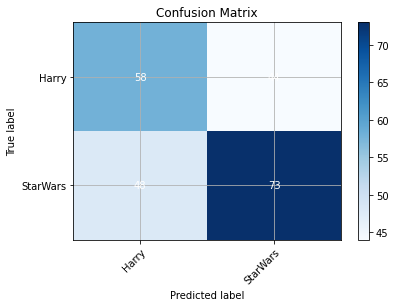

In [ ]:
y_pred = model.predict(X_val)  # Most prevalent prediction
cm = confusion_matrix(y_val, y_pred)

#ploting confusing matrix on validation set
plot_confusion_matrix(cm)

In [ ]:
cm

array([[58, 44],
       [48, 73]])

We can see that there are alot of misclasification even when we have taken features like Pitch and power from the audio files.

# **7.Dataset**

#### Analysing Harry Potter files:

In [ ]:
harry = scaled_data[scaled_data['song_lable']==1]

Humming files:


In [ ]:
h_hum= harry[harry['interpret_lable']==True].iloc[:,0:4]
harry[harry['interpret_lable']==True].describe()

,voiced_fr,pitch_std,pitch_mean,power,song_lable
count,293.000000,293.000000,293.000000,293.000000,293.0
mean,-0.013268,-0.440776,0.284131,0.280623,1.0
std,0.594443,0.756214,0.965292,0.900584,0.0
min,-0.848125,-1.602948,-1.754984,-4.735995,1.0
25%,-0.368493,-0.999734,-0.507893,-0.178429,1.0
50%,-0.114749,-0.768538,0.202206,0.488305,1.0
75%,0.188884,0.453625,1.096528,0.885614,1.0
max,4.780180,1.375325,3.507974,1.703331,1.0


<Figure size 720x432 with 0 Axes>

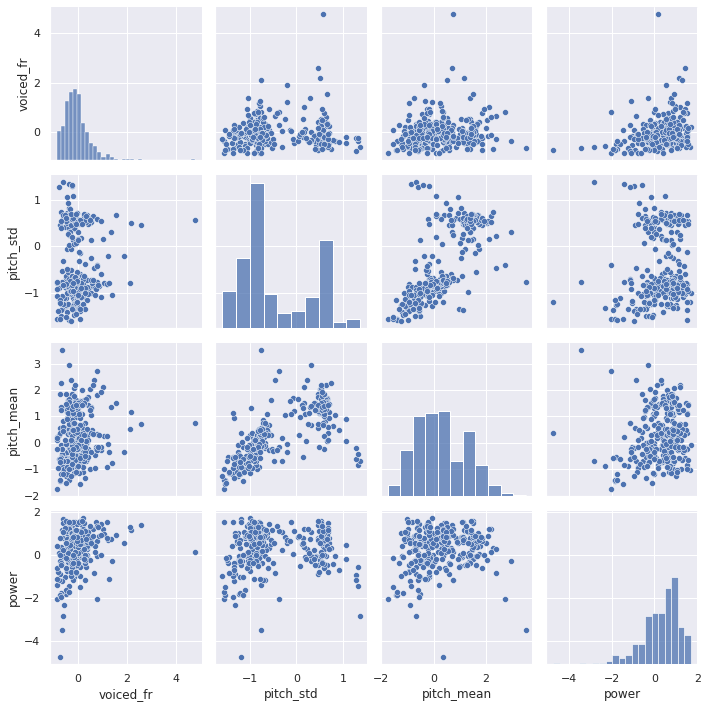

In [ ]:
# Create the default pairplot for humming files of Harry Potter 
plt.figure(figsize = (10,6))
sns.pairplot(h_hum)

Whistling files:

In [ ]:
h_whistle= harry[harry['interpret_lable']==False].iloc[:, 0:4]
harry[harry['interpret_lable']==False].describe()

,voiced_fr,pitch_std,pitch_mean,power,song_lable
count,118.000000,118.000000,118.000000,118.000000,118.0
mean,-0.007283,1.262537,-0.420923,-0.513805,1.0
std,0.913292,0.246565,0.732859,1.107811,0.0
min,-0.837427,-0.768391,-1.975527,-5.221279,1.0
25%,-0.450639,1.205921,-0.818976,-1.143190,1.0
50%,-0.235740,1.269271,-0.464980,-0.346945,1.0
75%,0.096678,1.371629,-0.123741,0.265039,1.0
max,6.219783,1.654696,4.515969,1.302643,1.0


<Figure size 720x432 with 0 Axes>

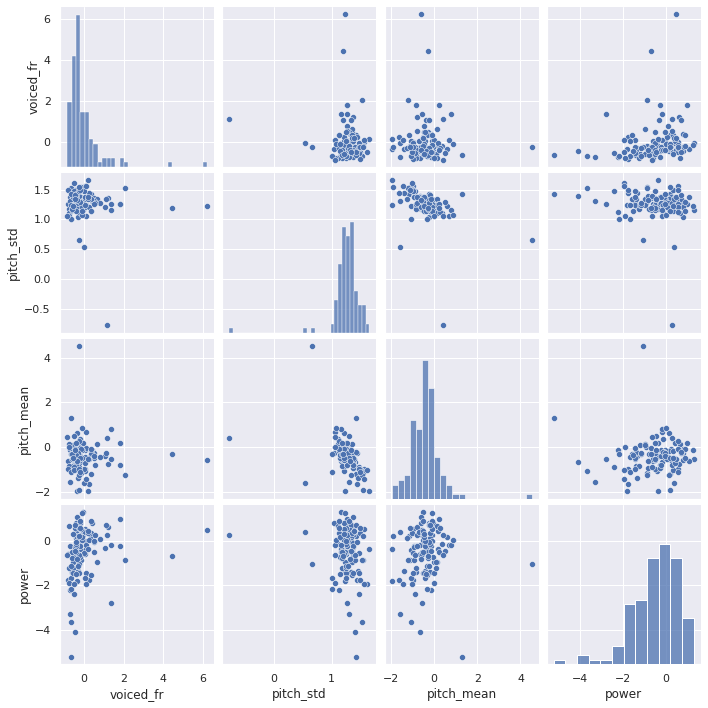

In [ ]:
# Create the default pairplot for whistling files of Harry Potter 
plt.figure(figsize = (10,6))
sns.pairplot(h_whistle)

### Analysing Starwars files:

In [ ]:
starwars = scaled_data[scaled_data['song_lable']==3]

Humming files:

In [ ]:
s_hum= starwars[starwars['interpret_lable']==True].iloc[:,0:4]
starwars[starwars['interpret_lable']==True].describe()

,voiced_fr,pitch_std,pitch_mean,power,song_lable
count,301.000000,301.000000,301.000000,301.000000,301.0
mean,-0.009375,-0.529617,0.091780,0.149610,3.0
std,1.252157,0.668266,1.069579,0.795476,0.0
min,-0.847623,-1.580784,-1.889919,-5.152169,3.0
25%,-0.447858,-1.090639,-0.761665,-0.354481,3.0
50%,-0.255092,-0.600132,-0.146114,0.236091,3.0
75%,0.069453,-0.106653,1.009792,0.729799,3.0
max,11.052692,1.609208,4.141687,1.763639,3.0


<Figure size 720x432 with 0 Axes>

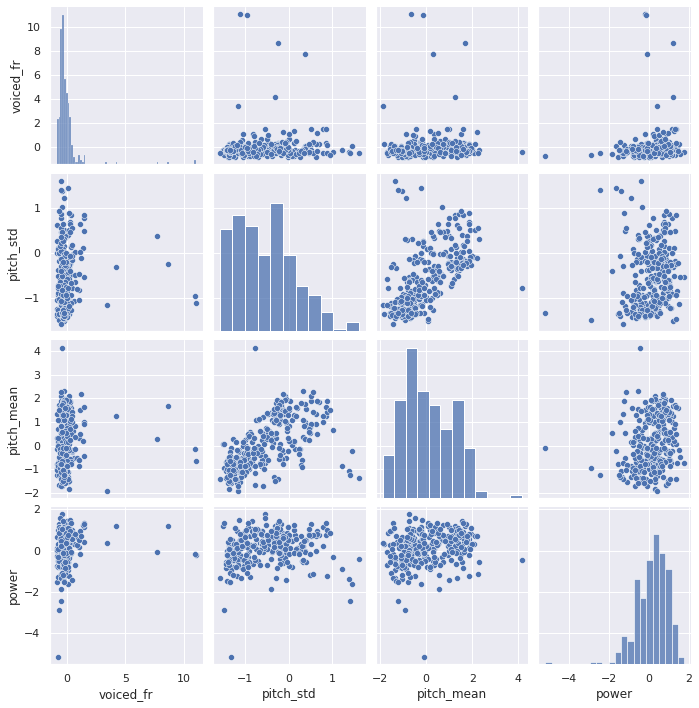

In [ ]:
# Create the default pairplot for humming files of Harry Potter 
plt.figure(figsize = (10,6))
sns.pairplot(s_hum)

Whistling files:

In [ ]:
s_whistle= starwars[starwars['interpret_lable']==False].iloc[:,0:4]
starwars[starwars['interpret_lable']==False].describe()

,voiced_fr,pitch_std,pitch_mean,power,song_lable
count,112.000000,112.000000,112.000000,112.000000,112.0
mean,0.067579,1.246273,-0.546493,-0.594875,3.0
std,1.171212,0.335938,0.767199,1.174634,0.0
min,-0.815087,-1.138130,-1.923800,-5.338368,3.0
25%,-0.488771,1.177050,-0.985133,-1.038480,3.0
50%,-0.253039,1.307072,-0.603935,-0.352514,3.0
75%,0.109704,1.403746,-0.313502,0.211237,3.0
max,7.919501,1.631957,3.534629,1.149328,3.0


<Figure size 720x432 with 0 Axes>

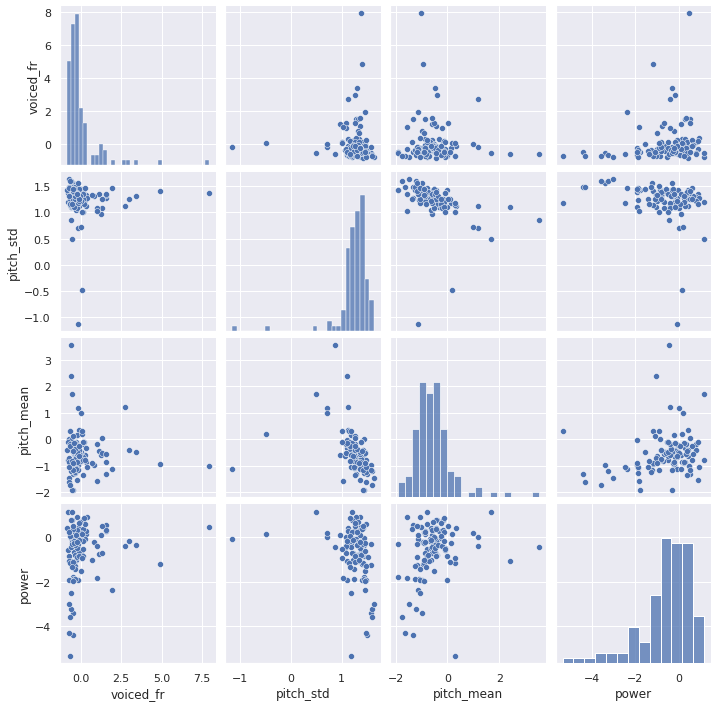

In [ ]:
# Create the default pairplot for humming files of Harry Potter 
plt.figure(figsize = (10,6))
sns.pairplot(s_whistle)

Pattern Analysis:

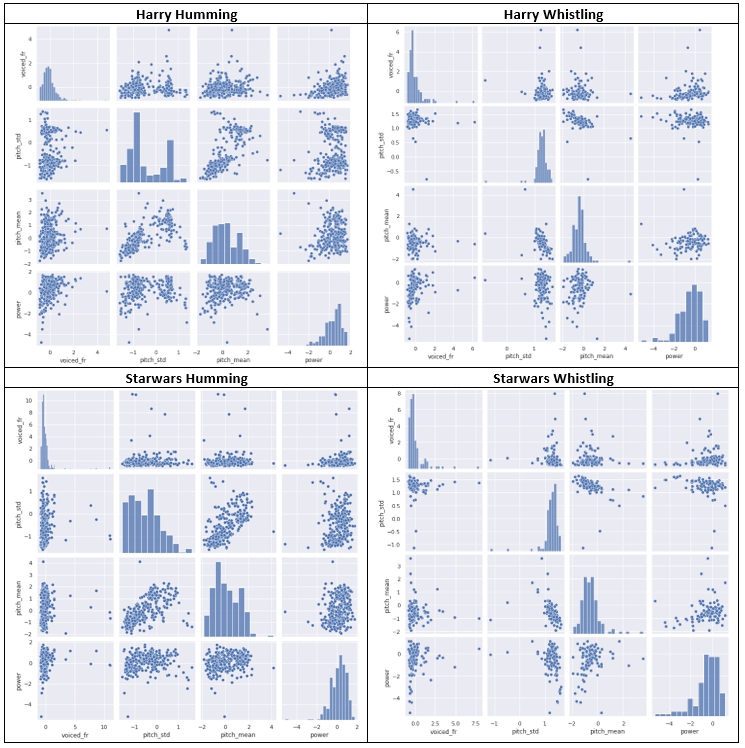

# **8.Results**


Lets us test the model on the test files:


In [ ]:
print('Size of testing set:', X_test.shape, y_test.shape)

Size of testing set: (25, 4) (25,)


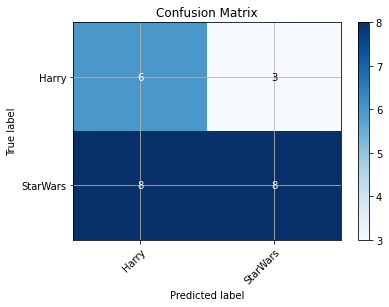

In [ ]:
y_tpred = model.predict(X_test)  # Most prevalent prediction
cm = confusion_matrix(y_test, y_tpred)

#ploting confusing matrix on validation set
plot_confusion_matrix(cm)

In [ ]:
print('Training Accuracy', np.mean(yt_p==y_train))
print('Testing Accuracy', np.mean(y_tpred==y_test))

Training Accuracy 0.6840277777777778
Testing Accuracy 0.56


In [ ]:
test_df= X_test
test_df['y_actual']= np.where(y_test == 1, 'Harry', 'StarWars')
test_df['y_predicted']=np.where(y_tpred == 1, 'Harry', 'StarWars')

In [ ]:
test_df[test_df['y_actual']=='Harry']

,voiced_fr,pitch_std,pitch_mean,power,y_actual,y_predicted
387,-0.192800,1.299373,-0.495661,0.904873,Harry,Harry
306,-0.232569,0.208356,0.080443,-0.176306,Harry,StarWars
277,-0.680602,-1.371268,-0.574208,-1.930322,Harry,Harry
406,-0.073741,0.690811,1.426785,1.156173,Harry,Harry
314,0.017991,-0.777636,0.288720,0.590303,Harry,Harry
135,0.060150,0.487679,1.124391,0.604133,Harry,Harry
32,-0.269187,-0.065854,1.714245,0.043715,Harry,StarWars
278,-0.666766,1.246759,-0.327909,-1.145504,Harry,Harry
89,0.321151,-1.027599,-0.669561,-0.533044,Harry,StarWars


In [ ]:
test_df[test_df['y_actual']=='StarWars']

,voiced_fr,pitch_std,pitch_mean,power,y_actual,y_predicted
572,-0.729400,1.631957,-1.470111,-3.008840,StarWars,StarWars
726,1.028819,-0.465407,-0.584124,0.495268,StarWars,Harry
764,1.229629,-0.117856,2.199771,0.698801,StarWars,Harry
614,-0.343764,0.280854,-0.817452,0.330238,StarWars,StarWars
557,-0.145202,-0.606179,-0.707242,0.751499,StarWars,StarWars
568,-0.589138,1.182601,-1.043375,-2.486057,StarWars,Harry
717,-0.013659,-0.025046,0.744186,-0.529689,StarWars,StarWars
763,0.104031,-1.199575,0.169698,-0.775648,StarWars,Harry
667,-0.426195,-1.343442,-0.258295,-0.095133,StarWars,Harry
436,-0.288208,1.212267,-0.636662,-1.026361,StarWars,Harry


# **9.Conclusion**

Training Accuracy 0.6840277777777778

Validation  Accuracy 0.5874439461883408

Testing Accuracy 0.56

We can improve the model by including advance features of adio processing like mfcc, chroma, melody (to be included in the advance solution)